# Classification Models

The goal of this project is to predict the success of the marketing campaign based on the available features and to evaluate the performance of different classifiers.

To achieve this, we will use various classification techniques and tools, such as:
* Logistic regression
* Decision tree
* Support vector machine
* Neural network ensemble 
classifiers. 

We will also perform grid search to tune hyperparameters and data sensitivity analysis to obtain the most relevant features for each model. 

Finally, we will compare the performance of the classifiers using ROC, Lift, and Gain curves, which are widely used metrics in marketing campaigns to evaluate the quality of the classifier and optimize the campaign. 

Through this project, we hope to provide some valuable insights and recommendations for improving the effectiveness of the marketing campaign.

## Dataset and Libraries Load 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


In [ ]:
# Define the file path to the csv file
path_file = '/content/drive/MyDrive/Notebooks/RockingData/RockingDataChallenge/Python/dataset/bank-additional-full.csv'

df = pd.read_csv(path_file,
                 sep = ';')

# Set the precision for displayed values to 2 decimal signs
pd.options.display.float_format = '{:.2f}'.format

# Check correct loading of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [ ]:
df.drop('duration', axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

### Normalization and Encoding

In [ ]:
# Select the numeric features you want to normalize
numeric_features = df.select_dtypes(exclude='object').columns

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(df[numeric_features])

target_coding = {"no": 0, "yes": 1}
df["y"] = df["y"].map(target_coding)
df.head()

# Select the categorical features you want to encode
cat_features = df.select_dtypes(include='object').columns

# Use Pandas' get_dummies() function to perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_features)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [ ]:
target = df_encoded['y']
df_encoded.drop('y', axis='columns', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# Transform the numeric features in the training and testing sets
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12556,-0.00,-0.20,0.20,-0.35,0.84,0.59,-0.47,0.77,0.85,0,...,0,0,0,1,0,0,0,0,1,0
35451,-0.87,0.52,0.20,-0.35,-1.20,-1.18,-1.23,-1.37,-0.94,1,...,0,0,0,1,0,0,0,0,1,0
30592,1.82,1.24,0.20,1.67,-1.20,-1.18,-1.23,-1.31,-0.94,0,...,0,0,0,1,0,0,0,1,0,0
17914,0.29,0.88,0.20,-0.35,0.84,0.59,-0.47,0.77,0.85,0,...,0,0,0,0,0,1,0,0,1,0
3315,-0.10,-0.20,0.20,-0.35,0.65,0.72,0.89,0.71,0.33,1,...,0,0,0,0,1,0,0,0,1,0


## Classification Models

### Logistic Regression model


A logistic regression model is defined in Keras, compiled it with the binary_crossentropy loss function and the Adam optimizer, and trained it on the training data using the fit method.

In this case, no hyperparameter tuning is performed.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define a logistic regression model in Keras
LRmodel = Sequential()
LRmodel.add(  Dense(units= 1, 
                  input_dim=X_train.shape[1],
                  activation='sigmoid')
)

# Compile the model with the binary_crossentropy loss function and the Adam optimizer
LRmodel.compile(  loss      ='binary_crossentropy',
                  optimizer =Adam(lr=0.001),
                  metrics=['accuracy']
                )

# Train the model on the training data
LRhistory = LRmodel.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1030/1030 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8872 - val_loss: 0.2942 - val_accuracy: 0.8962
Epoch 2/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2818 - accuracy: 0.8996 - val_loss: 0.2884 - val_accuracy: 0.8961
Epoch 3/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2779 - accuracy: 0.8997 - val_loss: 0.2869 - val_accuracy: 0.8960
Epoch 4/20
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2767 - accuracy: 0.8995 - val_loss: 0.2867 - val_accuracy: 0.8956
Epoch 5/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2764 - accuracy: 0.9006 - val_loss: 0.2865 - val_accuracy: 0.8962
Epoch 6/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2762 - accuracy: 0.9006 - val_loss: 0.2863 - val_accuracy: 0.8955
Epoch 7/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2760 - accuracy: 0.9007 - val_loss: 0.2866 - val_accuracy: 0.8963
Epo

### Decision Tree model

A decision tree model is defined using scikit-learn's DecisionTreeClassifier class and train it on the training data using the fit method.

We then use the trained model to predict the target values for the test set using the predict method, and calculate the accuracy of the model using the accuracy_score function.

Note that decision tree models can sometimes overfit to the training data, especially if the tree is deep or the dataset is small.
Then, a hyperparameter tuning was performed to optimize the performance of the model.


In [ ]:
# Define and train a decision tree model
DTmodel = DecisionTreeClassifier(
                                  criterion = 'entropy',
                                 splitter = 'best',
                                 max_depth = 6,
                                 max_features = None, 
                                 min_samples_leaf = 1,
                                 min_samples_split = 5
                                )
DTmodel.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = DTmodel.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("DT Model accuracy:", accuracy)

DT Model accuracy: 0.8980335032774945


#### GridSearch Hyperparameter Tuning for DT model

The GridSearchCV class fits the model with all possible combinations of hyperparameters in the specified range, and selects the best model based on the average validation score.


In [ ]:
# Define a decision tree classifier
DTmodel2 = DecisionTreeClassifier(
                                  criterion = 'entropy',
                                 splitter = 'best'
                                )

# Define a range of values for the hyperparameters to search over
param_grid = {'max_depth': [5, 6, 7,8],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

# Perform a GridSearchCV over the hyperparameters using 3-fold cross-validation
grid_search = GridSearchCV(DTmodel2, param_grid, cv=3,verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Predict the target values for the test set using the best model
best_DT = grid_search.best_estimator_
y_pred = best_DT.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Best DT Model accuracy:", accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, max

### SVM with GridSearchCV

Next, a support vector machine classifier is defined with an RBF kernel using scikit-learn's SVC class. We also define a range of values for the C and gamma hyperparameters to search over using a dictionary.

We then perform a GridSearch CV over the C and gamma hyperparameters using scikit-learn's GridSearchCV class and 3-fold cross-validation. 

After the grid search is complete, we print the best hyperparameters and the corresponding accuracy score to the console.

We then use the best model to predict the target values for the test set using the predict method, and calculate the accuracy of the best model on the test set using the accuracy_score function.

Notes:
* The RBF kernel is a popular choice for SVMs and is particularly useful when the decision boundary between classes is nonlinear. 
* The C hyperparameter controls the tradeoff between maximizing the margin and minimizing the classification error.
* The gamma hyperparameter controls the smoothness of the decision boundary. 

In [ ]:
# Define a support vector machine classifier with an RBF kernel
SVMmodel = SVC(kernel='rbf')

# Define a range of values for the C and gamma hyperparameters to search over
#gamma_grid = [-15.0, -11.0,-7.0,-3.0,0.1,1,3,10]
#C_grid =[0.1,0.3,1,3,10]
gamma_grid = [-0.3,0.1,3]
C_grid =[0.1,3]
param_grid = {'C': C_grid, 'gamma':gamma_grid}

# Perform a GridSearch CV over the C and gamma hyperparameters using 3-fold cross-validation
grid_search = GridSearchCV(SVMmodel, param_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Predict the target values for the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model on the test set
SVMaccuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", SVMaccuracy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................................C=0.1, gamma=-0.3; total time=   0.1s
[CV] END ..................................C=0.1, gamma=-0.3; total time=   0.1s
[CV] END ..................................C=0.1, gamma=-0.3; total time=   0.1s
[CV] END ..................................C=0.1, gamma=-0.3; total time=   0.0s
[CV] END ..................................C=0.1, gamma=-0.3; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.2min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.2min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.2min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.6min
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.2min
[CV] END .....................................C=0.1, gamma=3; total time= 3.4min
[CV] END .....................................C=0

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_vali

Best hyperparameters: {'C': 0.1, 'gamma': 0.1}
Accuracy score: 0.8996054628224585


NameError: ignored

In [ ]:
# Define a support vector machine classifier with an RBF kernel and best hyperparameters: {'C': 0.1, 'gamma': 0.1}
SVMmodel = SVC(kernel='rbf',
                C = 0.1,
                gamma = 0.1,
                probability=True
               )
SVMmodel.fit(X_train, y_train)
y_pred = SVMmodel.predict(X_test)

# Calculate the accuracy of the best model on the test set
SVMaccuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", SVMaccuracy)

Test accuracy: 0.8971837824714737


### NN classifier 

In this section, we first define a function create_model that creates a Keras model with one hidden layer, using the Dense layer class to define the layers and the Sequential model class to stack them. We define a range of values for the number of neurons in the hidden layer to search over using a dictionary.

Next, we define the number of models to include in the ensemble and train them using KerasClassifier, which is a wrapper class that allows Keras models to be used with scikit-learn's GridSearchCV. 

We then perform a GridSearchCV over the number of neurons in the hidden layer using scikit-learn's GridSearchCV class and 3-fold cross-validation for the first classifier in the ensemble. After the grid search is complete, we print the best hyperparameters and the corresponding accuracy score to the console for each classifier in the ensemble, and use the best hyperparameters to retrain each model.

Finally, we print the average accuracy score and best hyperparameters across all classifiers in the ensemble.

Note that tuning of other hyperparameters, such as the learning rate and regularization strength, can be performed to further optimize the performance of the model.

In [ ]:
# Define a function to create the Keras model with one hidden layer
def create_model(hidden_layer_sizes=10, input_dim = X_train.shape[1]):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes, activation='relu', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a range of values for the number of neurons in the hidden layer to search over
param_grid = {'hidden_layer_sizes': [2,4,6,8,10]}

# Define the number of models to include in the ensemble
n_models = 3

# Train an ensemble of N Keras classifiers with different random initializations
NNclassifiers = [KerasClassifier(build_fn=create_model, hidden_layer_sizes=10, epochs=20, batch_size=32, verbose=1) for i in range(n_models)]

# Perform a GridSearchCV over the number of neurons in the hidden layer using 3-fold cross-validation
grid_search = GridSearchCV(estimator=NNclassifiers[0], param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score for each classifier in the ensemble
for i, clf in enumerate(NNclassifiers):
    print(f"Training classifier {i+1}...")
    clf.set_params(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'])
    clf.fit(X_train, y_train)
    print(f"Best hyperparameters for classifier {i+1}: {grid_search.best_params_}")
    print(f"Accuracy score for classifier {i+1}: {clf.score(X_train, y_train)}\n")

# Print the average accuracy score and best hyperparameters across all classifiers in the ensemble
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Average accuracy score across {n_models} classifiers: {best_score}")
print(f"Best hyperparameters across {n_models} classifiers: {best_params}")

<ipython-input-23-9a3c2b84c71e>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  NNclassifiers = [KerasClassifier(build_fn=create_model, hidden_layer_sizes=10, epochs=20, batch_size=32, verbose=1) for i in range(n_models)]


Epoch 1/20
687/687 [==============================] - 7s 8ms/step - loss: 0.3679 - accuracy: 0.8616
Epoch 2/20
687/687 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.8979
Epoch 3/20
687/687 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.8999
Epoch 4/20
687/687 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9009
Epoch 5/20
687/687 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9008
Epoch 6/20
687/687 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.9012
Epoch 7/20
687/687 [==============================] - 2s 2ms/step - loss: 0.2762 - accuracy: 0.9004
Epoch 8/20
687/687 [==============================] - 2s 2ms/step - loss: 0.2761 - accuracy: 0.9009
Epoch 9/20
687/687 [==============================] - 2s 3ms/step - loss: 0.2758 - accuracy: 0.9008
Epoch 10/20
687/687 [==============================] - 2s 3ms/step - loss: 0.2756 - accuracy: 0.9007

In [ ]:
# Model definition without GridSearch
# Define the number of models to include in the ensemble
n_models = 3

# Train an ensemble of N Keras classifiers with different random initializations
NNclassifiers = [KerasClassifier(build_fn=create_model, hidden_layer_sizes=6, epochs=20, batch_size=32, verbose=1) for i in range(n_models)]

for i, clf in enumerate(NNclassifiers):    
    clf.fit(X_train, y_train)

<ipython-input-15-108c0c16ba42>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  NNclassifiers = [KerasClassifier(build_fn=create_model, hidden_layer_sizes=10, epochs=20, batch_size=32, verbose=1) for i in range(n_models)]


Epoch 1/20
1030/1030 [==============================] - 6s 3ms/step - loss: 0.3058 - accuracy: 0.8881
Epoch 2/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2761 - accuracy: 0.9009
Epoch 3/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2751 - accuracy: 0.9007
Epoch 4/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2741 - accuracy: 0.9012
Epoch 5/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2733 - accuracy: 0.9022
Epoch 6/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy: 0.9025
Epoch 7/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2715 - accuracy: 0.9014
Epoch 8/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2710 - accuracy: 0.9014
Epoch 9/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.2703 - accuracy: 0.9025
Epoch 10/20
1030/1030 [==============================] - 2s 2ms/step - loss: 0.269

### Data sensitivity analysis (DSA)

#### DSA Logistic Regressor
After training the model, we get the weights of the trained model using the get_weights method and extract the first set of weights, which correspond to the weights of the input layer.
We then create a Pandas DataFrame with the feature names and corresponding weights, sort the DataFrame by the absolute value of the weights to get the most relevant features, and print the top features and their corresponding weights to the console.

Note that the weights of the logistic regression model represent the importance of each feature for predicting the target variable. Features with higher positive weights are more predictive of the positive class, while features with higher negative weights are more predictive of the negative class. Features with weights close to zero have little or no impact on the prediction. 

In [ ]:
# Get the weights of the trained model
LRweights = LRmodel.get_weights()[0]

# Create a DataFrame with the feature names and corresponding weights
df_LR_feature_weights = pd.DataFrame({'feature': df_encoded.columns, 'weight': LRweights.flatten()})

# Sort the DataFrame by the absolute value of the weights
df_LR_feature_weights = df_LR_feature_weights.reindex(df_LR_feature_weights['weight'].abs().sort_values(ascending=False).index)

# Print the most relevant features and their corresponding weights
df_LR_feature_weights.head(10)

,feature,weight
35,default_yes,-1.17
49,month_mar,0.99
50,month_may,-0.69
59,poutcome_failure,-0.67
4,emp.var.rate,-0.59
43,contact_telephone,-0.53
37,housing_unknown,-0.44
51,month_nov,-0.42
29,education_illiterate,0.41
20,job_unknown,-0.39


#### DSA DT

In [ ]:
# Get the most relevant features according to the Decision Tree
features_weights  = DTmodel.feature_importances_
features_names    = df_encoded.columns 
df_DT_f_relevance = pd.DataFrame(list(zip(features_names,features_weights)),
                              columns=['feature','relevance'])

df_DT_f_relevance.sort_values('relevance', inplace=True, ascending = False)
df_DT_f_relevance.head(10)

,feature,relevance
8,nr.employed,0.63
6,cons.conf.idx,0.10
2,pdays,0.08
7,euribor3m,0.05
43,contact_telephone,0.03
0,age,0.03
52,month_oct,0.03
1,campaign,0.01
59,poutcome_failure,0.01
4,emp.var.rate,0.01


#### DSA for NN ensemble

258/258 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8955


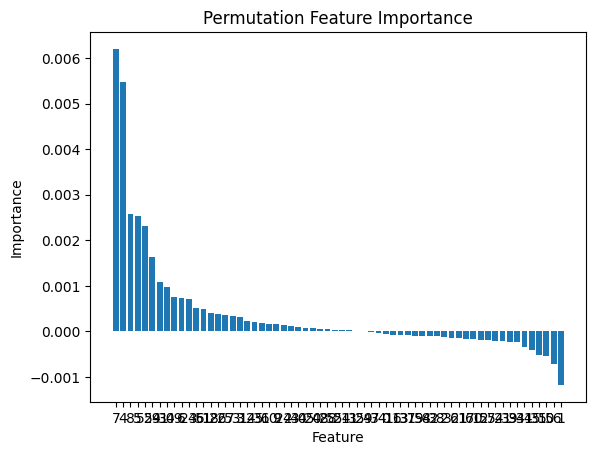

In [ ]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance scores
result = permutation_importance(NNclassifiers[0], X_test, y_test, n_repeats=10, random_state=0)

# Get the feature importance scores and their indices
importance = result.importances_mean
indices = np.argsort(importance)[::-1]


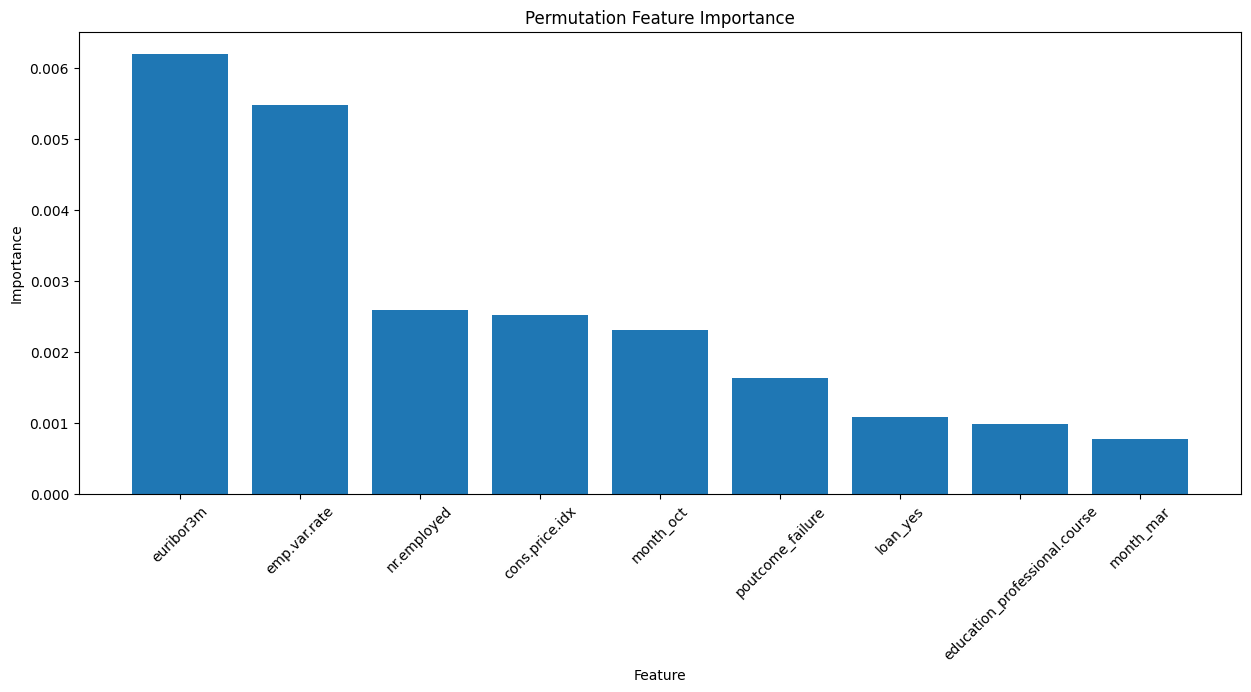

In [ ]:
features_names    = df_encoded.columns 
feature_axis = [features_names[index] for index in indices]

# Plot the feature importance scores
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1) 
ax.bar(range(9), importance[indices[0:9]])
plt.xticks(range(9), feature_axis[0:9],rotation=45)
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
ax.set_title('Permutation Feature Importance')
plt.show()

## Performance Comparison



#### ROC Curve and AUC score
ROC (Receiver Operating Characteristic) curve: The ROC curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The area under the ROC curve (AUC) is a widely used metric to evaluate the quality of classifiers, as it measures the ability of the classifier to distinguish between the positive and negative classes. In the context of marketing campaigns, the ROC curve can be used to evaluate the performance of the classifier in predicting the success of the campaign, and to compare the performance of different classifiers.

258/258 [==============================] - 0s 1ms/step


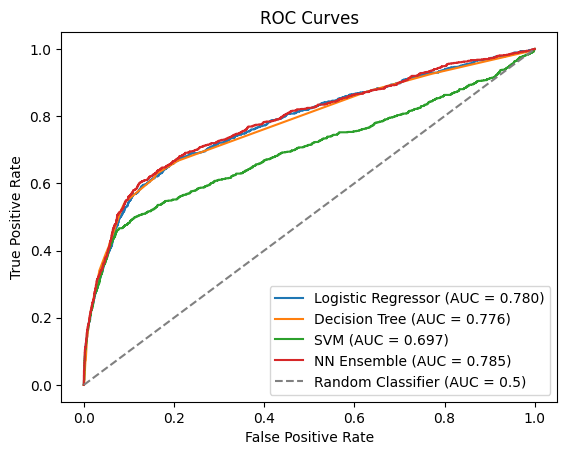

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a list of classifiers
classifiers = [LRmodel, DTmodel, SVMmodel, NNclassifiers]

# Define a list of labels for the classifiers
labels = ['Logistic Regressor','Decision Tree', 'SVM', 'NN Ensemble']

# Compute ROC curves and AUC scores for each classifier
for clf, label in zip(classifiers, labels):
      
    # Predict probabilities for the positive class (class 1)
    try:
      y_prob = clf.predict_proba(X_test)[:, 1]
      
    except:
      try:
        y_prob = clf.predict(X_test).ravel()
      except:
        y_prob_aux = []
        y_prob_aux2 = [0]*X_test.shape[0]
        for i, clf_in in enumerate(clf):
          y_prob_aux.append(clf_in.predict_proba(X_test)[:, 1])

        
        for j in range(len(y_prob_aux[0])):
          for i in range(3):
            y_prob_aux2[j] += y_prob_aux[i][j]
        
        
        myInt = 3
        y_prob = [ a/myInt for a in y_prob_aux2] 
    
    # Compute the false positive rate (FPR), true positive rate (TPR), and threshold values for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Compute the area under the ROC curve (AUC)
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve and label it with the classifier name and AUC score
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.3f})')
    
# Plot the ROC curve for a random classifier with AUC = 0.5
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')

# Add axis labels and a legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()

#### Gain curve
The Gain curve is a graphical representation of the improvement of the classifier over a random guess. It plots the cumulative response rate of the classifier as a function of the proportion of the population contacted. The Gain curve can be used to determine the optimal number of contacts to achieve a desired response rate, and to compare the performance of different classifiers.

In [ ]:
import seaborn as sns
def plot_gain(y_real, y_proba, color = 'b', title = 'Gain Curve', label=''):

  
    # Prepare the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba


    # Sort by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)


    # Find the total number of positive classes on the dataset
    total_positive_count = sum(aux_df['y_real'] == 1)


    # For each line of data, check if it is positive, add to the counter and calculate the gain
    gain = 0
    subset_positive_count = 0
    gain_values = []
    for i in aux_df.index:
        if aux_df.loc[i]['y_real'] == 1:
            subset_positive_count += 1
        gain = subset_positive_count / total_positive_count
        gain_values.append(gain)


    # Plot the gain curve
    plt.plot([0, 1], [0,1], color = 'gray', linestyle = 'dashed', linewidth = 1)
    plt.plot([x/len(gain_values) for x in range(len(gain_values))], gain_values, color = color, label=label)

258/258 [==============================] - 0s 2ms/step


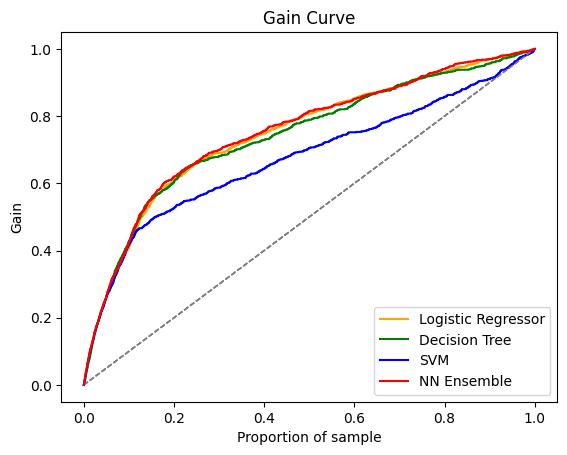

In [ ]:
# Define a list of classifiers
classifiers = [LRmodel, DTmodel, SVMmodel, NNclassifiers]

# Define a list of labels for the classifiers
labels = ['Logistic Regressor','Decision Tree', 'SVM', 'NN Ensemble']

color = ['red', 'blue', 'green','orange']
# Compute precision and recall values for each classifier
for clf, label in zip(classifiers, labels):
    # Predict probabilities for the positive class (class 1)
    try:
      y_prob = clf.predict_proba(X_test)[:, 1]
      
    except:
      try:
        y_prob = clf.predict(X_test).ravel()
      except:
        y_prob_aux = []
        y_prob_aux2 = [0]*X_test.shape[0]
        for i, clf_in in enumerate(clf):
          y_prob_aux.append(clf_in.predict_proba(X_test)[:, 1])

        
        for j in range(len(y_prob_aux[0])):
          for i in range(3):
            y_prob_aux2[j] += y_prob_aux[i][j]
        
        
        myInt = 3
        y_prob = [ a/myInt for a in y_prob_aux2] 
    
    # Plot Gain curve    
    color_plot = color.pop()
    plot_gain(y_test, y_prob,color=color_plot,label=label)


plt.xlabel('Proportion of sample')
plt.ylabel('Gain')
plt.title('Gain Curve')
plt.legend(loc='lower right')
plt.show()

#### Lift curve
The Lift curve is a graphical representation of the improvement of the classifier over a random guess. It plots the ratio of the response rate of the classifier to the response rate of a random selection, as a function of the proportion of the population contacted. The Lift curve can be used to identify the segment of the population that is most likely to respond to the campaign, and to determine the optimal number of contacts to maximize the conversion rate.

258/258 [==============================] - 0s 1ms/step


<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: divide by zero encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)
<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: invalid value encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)
<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: divide by zero encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)


 31/258 [==>...........................] - ETA: 0s

<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: divide by zero encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)
<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: invalid value encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)


258/258 [==============================] - 0s 1ms/step


<ipython-input-49-1bafa7eebc40>:42: RuntimeWarning: divide by zero encountered in true_divide
  lift = (precision * n_positives) / (recall * n_total)


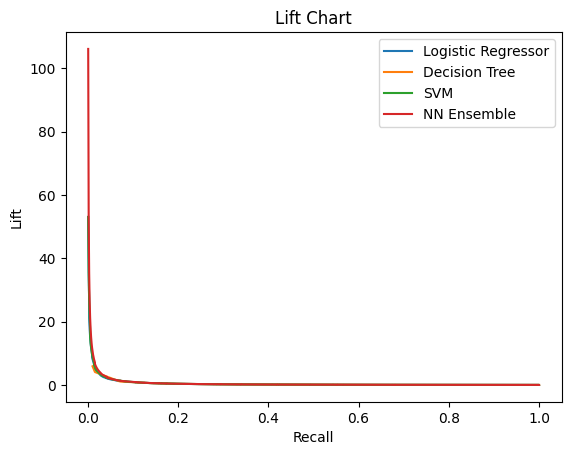

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Define a list of classifiers
classifiers = [LRmodel, DTmodel, SVMmodel, NNclassifiers]

# Define a list of labels for the classifiers
labels = ['Logistic Regressor','Decision Tree', 'SVM', 'NN Ensemble']

# Compute precision and recall values for each classifier
for clf, label in zip(classifiers, labels):
    # Predict probabilities for the positive class (class 1)
    try:
      y_prob = clf.predict_proba(X_test)[:, 1]
      
    except:
      try:
        y_prob = clf.predict(X_test).ravel()
      except:
        y_prob_aux = []
        y_prob_aux2 = [0]*X_test.shape[0]
        for i, clf_in in enumerate(clf):
          y_prob_aux.append(clf_in.predict_proba(X_test)[:, 1])

        
        for j in range(len(y_prob_aux[0])):
          for i in range(3):
            y_prob_aux2[j] += y_prob_aux[i][j]
        
        
        myInt = 3
        y_prob = [ a/myInt for a in y_prob_aux2] 
    
    # Compute precision and recall values for the classifier
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    # Compute the number of positive examples and the number of total examples
    n_positives = np.sum(y_test)
    n_total = len(y_test)
    
    # Compute the lift values for the classifier
    lift = (precision * n_positives) / (recall * n_total)

    # Plot the lift chart and label it with the classifier name
    plt.plot(recall, lift, label=label)
    
    
# Add axis labels and a legend to the plot
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
def plot_lift(y_real, y_proba, color = 'b', label=''):

    # Prepare the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba

    # Sort by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)

    # Find the total positive ratio of the whole dataset
    total_positive_ratio = sum(aux_df['y_real'] == 1) / aux_df.shape[0]

    # For each line of data, get the ratio of positives of the given subset and calculate the lift
    lift_values = []
    for i in aux_df.index:
        threshold = aux_df.loc[i]['y_proba']
        subset = aux_df[aux_df['y_proba'] >= threshold]
        subset_positive_ratio = sum(subset['y_real'] == 1) / subset.shape[0]
        lift = subset_positive_ratio / total_positive_ratio
        lift_values.append(lift)

    # Plot the lift curve
    plt.plot( [x/len(lift_values) for x in range(len(lift_values))], lift_values, color = color, label=label)
    plt.plot([0, 1], [1,1], color = 'gray', linestyle = 'dashed', linewidth = 1)

258/258 [==============================] - 0s 2ms/step


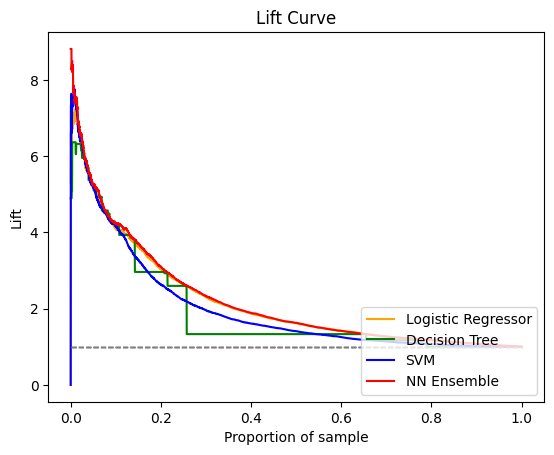

In [ ]:
# Define a list of classifiers
classifiers = [LRmodel, DTmodel, SVMmodel, NNclassifiers]

# Define a list of labels for the classifiers
labels = ['Logistic Regressor','Decision Tree', 'SVM', 'NN Ensemble']

color = ['red', 'blue', 'green','orange']
# Compute precision and recall values for each classifier
for clf, label in zip(classifiers, labels):
    # Predict probabilities for the positive class (class 1)
    try:
      y_prob = clf.predict_proba(X_test)[:, 1]
      
    except:
      try:
        y_prob = clf.predict(X_test).ravel()
      except:
        y_prob_aux = []
        y_prob_aux2 = [0]*X_test.shape[0]

        for i, clf_in in enumerate(clf):
          y_prob_aux.append(clf_in.predict_proba(X_test)[:, 1])

        for j in range(len(y_prob_aux[0])):
          for i in range(3):
            y_prob_aux2[j] += y_prob_aux[i][j]
        
        
        myInt = 3
        y_prob = [ a/myInt for a in y_prob_aux2] 
    
    # Plot the Lift curve    
    color_plot = color.pop()
    plot_lift(y_test, y_prob,color=color_plot,label=label)


plt.xlabel('Proportion of sample')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion:

In conclusion, this classification modeling project has provided some valuable insights into the effectiveness of the marketing campaign and the drivers and factors that influence its success. We have developed four classifiers, including logistic regression, decision tree, support vector machine, and neural network ensemble (n=3) classifiers. Among these, the neural network model was the better performing one, however, considering the computational cost and the little difference in performance, decision tree would be a great option too.

To further improve the performance of these classifiers, time information could be considered. In this dataset, no date of the data was stored, however, clients' tendencies change all the time. Then, it is common in this kind of problems to constantly retrain the models considering newer data, using some kind of sliding window fashion, so older tendencies are no longer considered, and more modern patterns are learned.

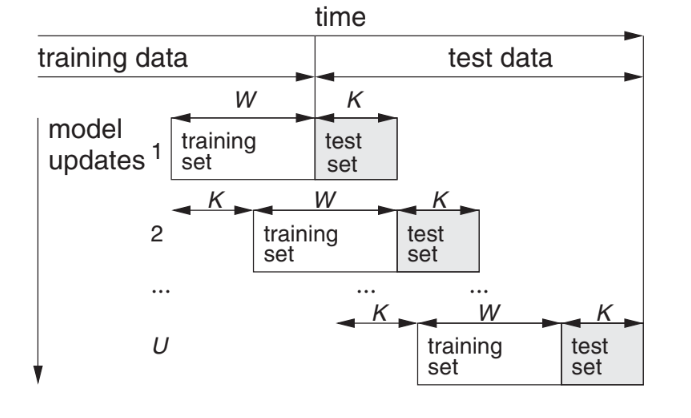